In [3]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
# будем отображать графики прямо в jupyter'e
%pylab inline                 
# увеличим дефолтный размер графиков
from pylab import rcParams    
rcParams['figure.figsize'] = 18, 15
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv("J:/HiEnd/mlcourse_open-master/mlcourse_open-master/data/video_games_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
# Данные об оценках есть не для всех фильмов, поэтому давайте оставим только те записи, в которых нет пропусков с помощью метода dropna.
df = df.dropna()
print(df.shape)
# смысл метода смотреть здесь https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
# дропает всё что Nun-object

(6825, 16)


In [6]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [7]:
# опеределяем признаки с которыми будем работать
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii           2006.0    Sports         82.53   
2         Mario Kart Wii      Wii           2008.0    Racing         35.52   
3      Wii Sports Resort      Wii           2009.0    Sports         32.77   
6  New Super Mario Bros.       DS           2006.0  Platform         29.80   
7               Wii Play      Wii           2006.0      Misc         28.92   

   Critic_Score  Critic_Count User_Score  User_Count Rating  
0          76.0          51.0          8       322.0      E  
2          82.0          73.0        8.3       709.0      E  
3          80.0          73.0          8       192.0      E  
6          89.0          65.0        8.5       431.0      E  
7          58.0          41.0        6.6       129.0      E

In [8]:
print(df[useful_cols].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 10 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Rating             6825 non-null object
dtypes: float64(5), object(5)
memory usage: 586.5+ KB
None


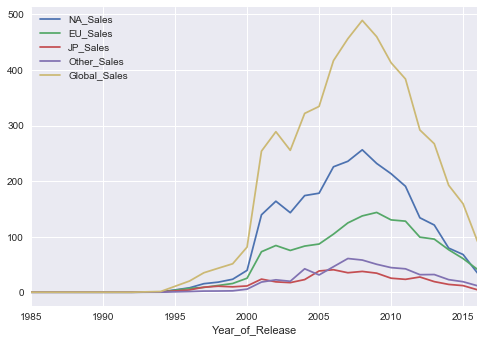

In [9]:
# Для примера построим график продаж видео игр в различных странах в зависимости от года.
# Для начала отфильтруем только нужные нам столбцы
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
# затем посчитаем суммарные продажи по годам и у получившегося dataframe вызовем функцию plot без параметров.
sales_df.groupby('Year_of_Release').sum().plot()

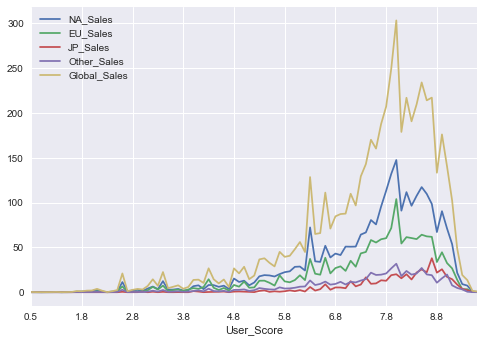

In [10]:
# поэкспериментируем
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['User_Score']]
sales_df.groupby('User_Score').sum().plot()

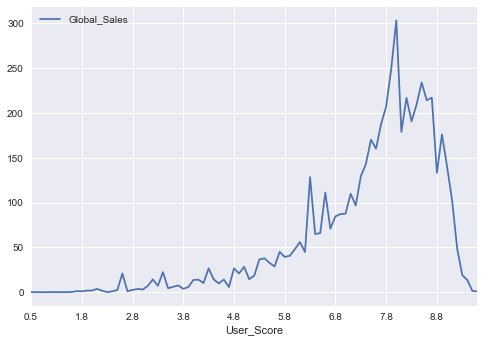

In [11]:
sales_df = df[[x for x in df.columns if 'Global_Sales' in x] + ['User_Score']]
sales_df.groupby('User_Score').sum().plot()

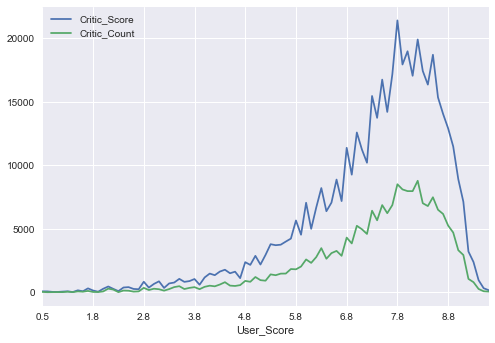

In [12]:
# ларчик просто открывался
# [x for x in df.columns if 'Sales' in x] - поиск подстроки Sales в строках df.colums содержащих objectname_sales.

sales_df = df[[x for x in df.columns if 'Critic' in x] + ['User_Score']]
sales_df.groupby('User_Score').sum().plot()

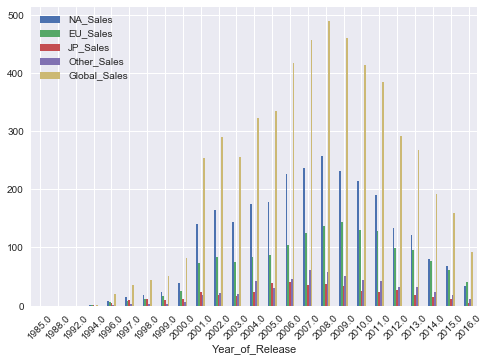

In [13]:
# C помощью параметра kind можно изменить тип графика, например, на bar chart.
# Matplotlib позволяет очень гибко настраивать графики. См.документацию
# Например, параметра rot отвечает за угол наклона подписей к оси x.
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

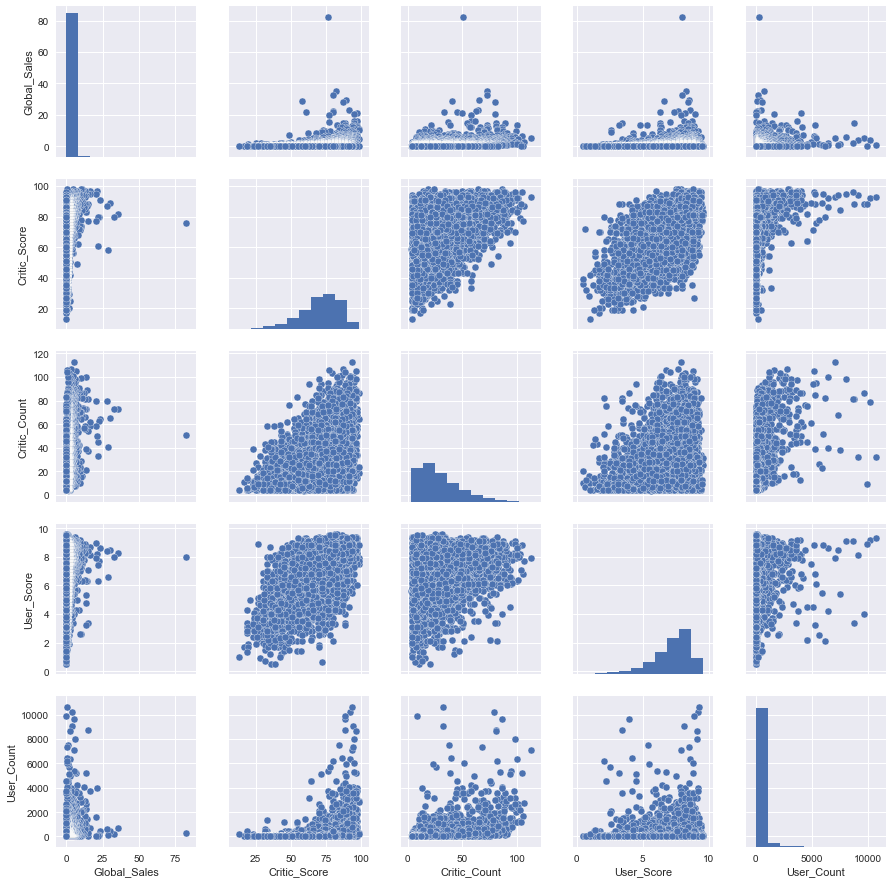

In [14]:
# Seaborn
# Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib.
# Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. 
# Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.
# Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix).
# Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.
# не забываем преобразоывать User_Score 10015 non-null object в float
df["User_Score"] = df["User_Score"].astype("float")
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')
# Для сохранения графиков в файлы стоит использовать метод savefig.

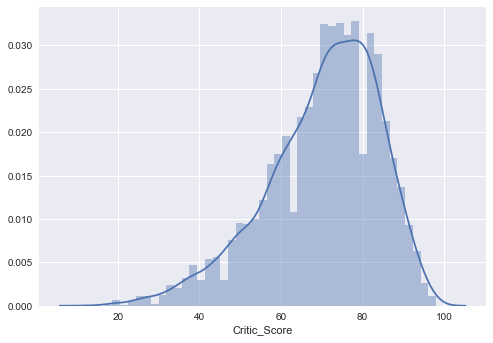

In [15]:
# С помощью seaborn можно построить и распределение dist plot.
# Для примера посмотрим на распределение оценок критиков Critic_Score. 
# По default'у на графике отображается гистограмма и kernel density estimation.
# https://en.wikipedia.org/wiki/Kernel_density_estimation
sns.distplot(df.Critic_Score)

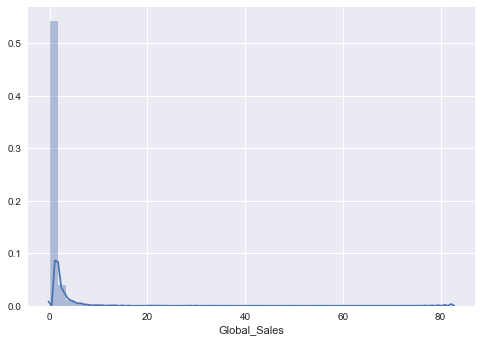

In [16]:
sns.distplot(df.Global_Sales)

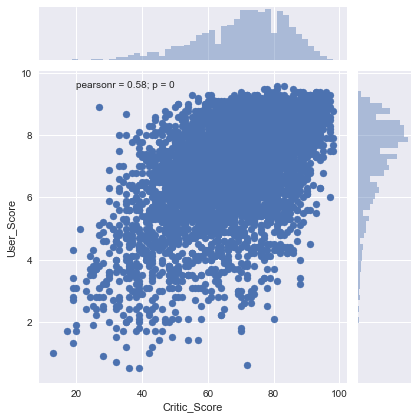

In [17]:
sns.jointplot(df.Critic_Score, df.User_Score)

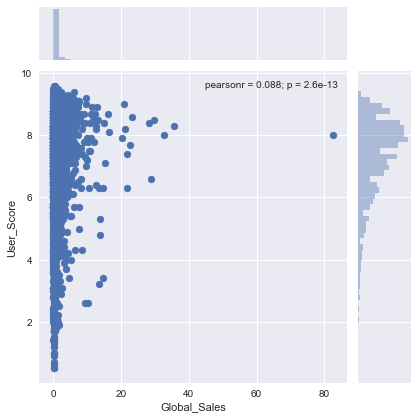

In [18]:
sns.jointplot(df.Global_Sales, df.User_Score)

In [19]:
sales_df = sales_df.dropna()
df.User_Score = df.User_Score.dropna()

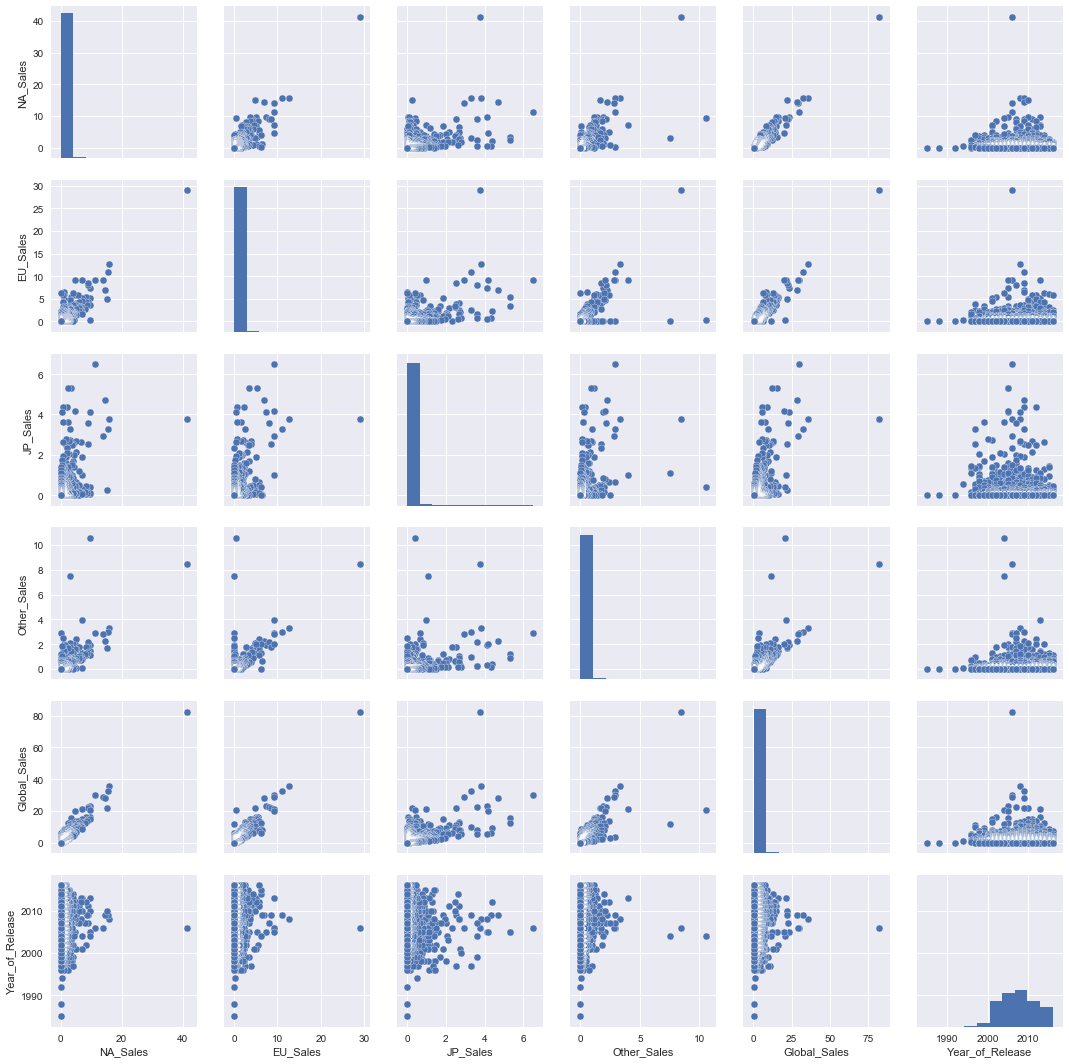

In [20]:
# пока не работает, но подумать можно.
# общий смысл в том что sales_df это таблица, а sns и .jointplot любит работать с однострочными series 
sns.pairplot(sales_df)

In [21]:
df.User_Score

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
8        8.4
11       8.6
13       7.7
14       6.3
15       7.4
16       8.2
17       9.0
19       7.9
23       8.1
24       8.7
26       7.1
28       8.4
29       3.4
32       6.3
34       5.3
35       4.8
36       6.3
37       3.2
38       8.5
39       8.9
40       8.2
41       6.4
42       8.3
43       8.7
44       7.8
        ... 
16513    7.9
16514    8.3
16527    8.3
16530    7.9
16532    6.9
16533    7.9
16534    5.5
16536    5.7
16541    7.5
16549    8.0
16550    9.5
16553    7.6
16569    8.0
16573    7.9
16576    8.6
16588    7.9
16595    6.8
16601    6.0
16617    2.1
16618    8.7
16624    8.2
16631    9.5
16634    8.2
16644    3.8
16656    8.5
16667    2.4
16677    8.8
16696    7.6
16700    5.8
16706    7.2
Name: User_Score, Length: 6825, dtype: float64

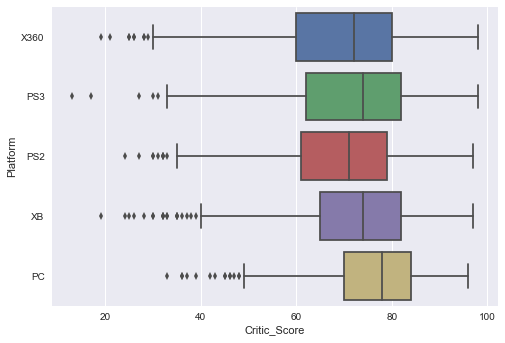

In [22]:
# Еще один полезный тип графиков — это box plot.
# Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

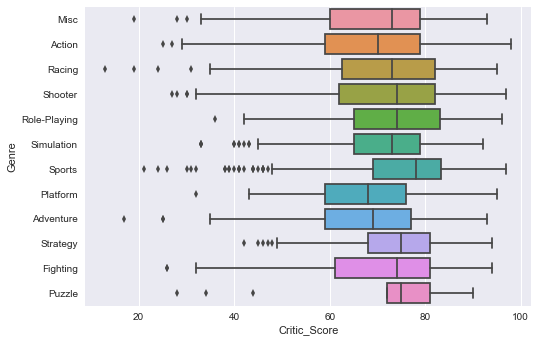

In [23]:
# а теперь сравним по оценку критиков по жанру
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Genre", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")
# что есть что
# Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили
# Черта внутри коробки обозначает медиану распределения.
# Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают
# в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах.
# Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

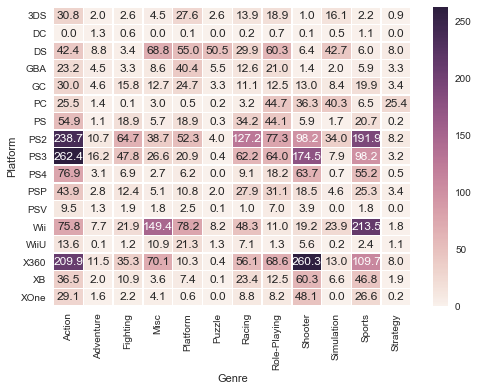

In [24]:
# heat map. 
# Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным.
# Визуализируем суммарные продажи игр по жанрам и игровым платформам.
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [25]:
# и тут меня пробило - ибо сводные таблицы наше всё, а умение строить хит мапы по сводным таблицам - свято как евангеле.
# но юпитер что то тупит, ладно потом потренируюсь в другом дата фрейме.

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [27]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [28]:
# Plotly — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код.
# Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, 
# скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.
# это божественно!

years_df = df.groupby('Critic_Score')[['Global_Sales']].sum().join(
    df.groupby('Critic_Score')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Critic_score_number'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [29]:
# В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые в библиотеке называются traces) 
# и оформления/стиля, за который отвечает объект layout. В простых случаях можно вызывать функцию iplot и просто от массива traces.
# Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. 
# Поскольку обычно это функциональность не нужна, то я предпочитаю скрывать ее для предотвращения случайных нажатий.
# Можно сразу сохранить график в виде html-файла.
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://C:\\Users\\Battlestation\\years_stats.html'

In [30]:
# Посмотрим также на рыночную долю игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке.
# Для этого построим bar chart.
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [31]:
plotly.offline.plot(fig, filename='Platforms.html', show_link=False)

'file://C:\\Users\\Battlestation\\Platforms.html'

In [32]:
# В plotly можно построить и box plot. Рассмотрим распределения оценок критиков в зависимости от жанра игры.
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

In [33]:
# Пример визуального анализа данных

df = pd.read_csv("J:/HiEnd/mlcourse_open-master/mlcourse_open-master/data/telecom_churn.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [34]:
df.shape

(3333, 20)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [36]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

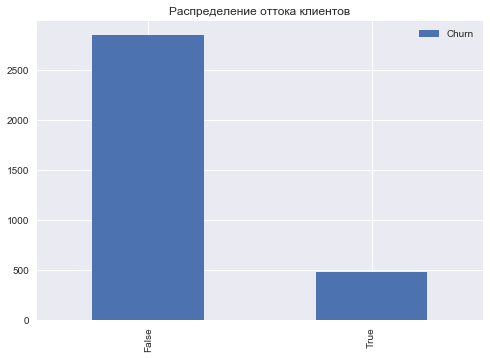

In [37]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

In [126]:
# Выделим следующие группы признаков (среди всех кроме Churn ):
# бинарные (object): International plan, Voice mail plan
# категориальные: State
# порядковые: Customer service calls
# количественные: все остальные
df.State

0       KS
1       OH
2       NJ
3       OH
4       OK
5       AL
6       MA
7       MO
8       LA
9       WV
10      IN
11      RI
12      IA
13      MT
14      IA
15      NY
16      ID
17      VT
18      VA
19      TX
20      FL
21      CO
22      AZ
23      SC
24      VA
25      NE
26      WY
27      MT
28      MO
29      HI
        ..
3303    WI
3304    IL
3305    IN
3306    AL
3307    OK
3308    IA
3309    VT
3310    NY
3311    LA
3312    SC
3313    ID
3314    MO
3315    ME
3316    MS
3317    SD
3318    OK
3319    WY
3320    GA
3321    VT
3322    MD
3323    IN
3324    WV
3325    OH
3326    OH
3327    SC
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [38]:
df["International plan"]

0        No
1        No
2        No
3       Yes
4       Yes
5       Yes
6        No
7       Yes
8        No
9       Yes
10       No
11       No
12       No
13       No
14       No
15       No
16       No
17       No
18       No
19       No
20       No
21       No
22       No
23       No
24       No
25       No
26       No
27       No
28       No
29       No
       ... 
3303     No
3304    Yes
3305     No
3306     No
3307     No
3308     No
3309    Yes
3310     No
3311     No
3312     No
3313     No
3314     No
3315     No
3316     No
3317    Yes
3318     No
3319     No
3320    Yes
3321     No
3322     No
3323     No
3324     No
3325     No
3326     No
3327     No
3328     No
3329     No
3330     No
3331    Yes
3332     No
Name: International plan, Length: 3333, dtype: object

In [137]:
df["Customer service calls"]

0       1
1       1
2       0
3       2
4       3
5       0
6       3
7       0
8       1
9       0
10      4
11      0
12      1
13      3
14      4
15      4
16      1
17      3
18      1
19      1
20      0
21      5
22      0
23      2
24      0
25      3
26      0
27      3
28      0
29      1
       ..
3303    2
3304    4
3305    2
3306    1
3307    4
3308    1
3309    4
3310    2
3311    2
3312    2
3313    1
3314    1
3315    0
3316    0
3317    1
3318    2
3319    3
3320    4
3321    3
3322    4
3323    5
3324    1
3325    2
3326    1
3327    2
3328    2
3329    3
3330    2
3331    2
3332    0
Name: Customer service calls, Length: 3333, dtype: int64

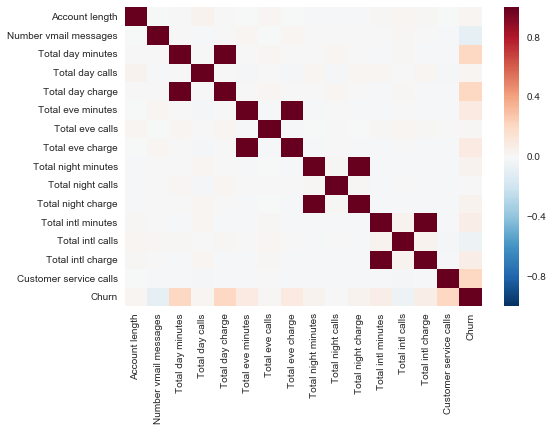

In [39]:
# Посмотрим на корреляции количественных признаков. 
# По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам 
# (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
sns.heatmap(corr_matrix);

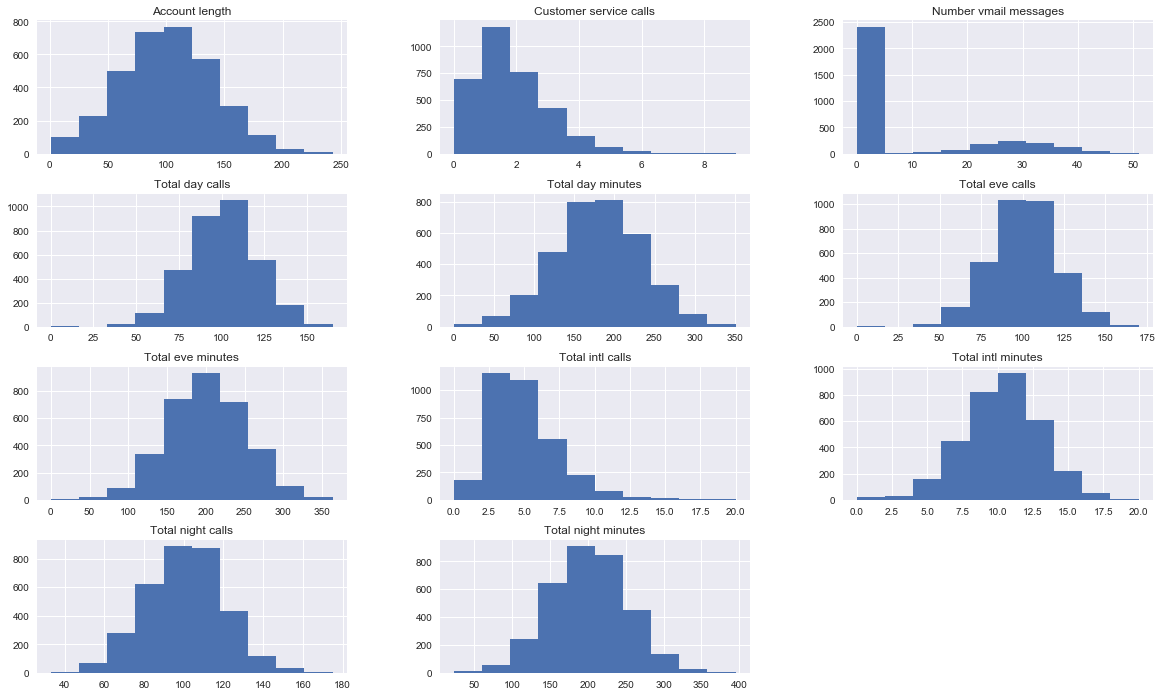

In [40]:
# Теперь посмотрим на распределения всех интересующих нас количественных признаков. 
# На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));
# Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (Customer service calls) 
# (тут больше подходит пуассоновское распределение) и число голосовых сообщений (Number vmail messages, пик в нуле,
# т.е. это те, у кого голосовая почта не подключена).
# Также смещено распределение числа международных звонков (Total intl calls).

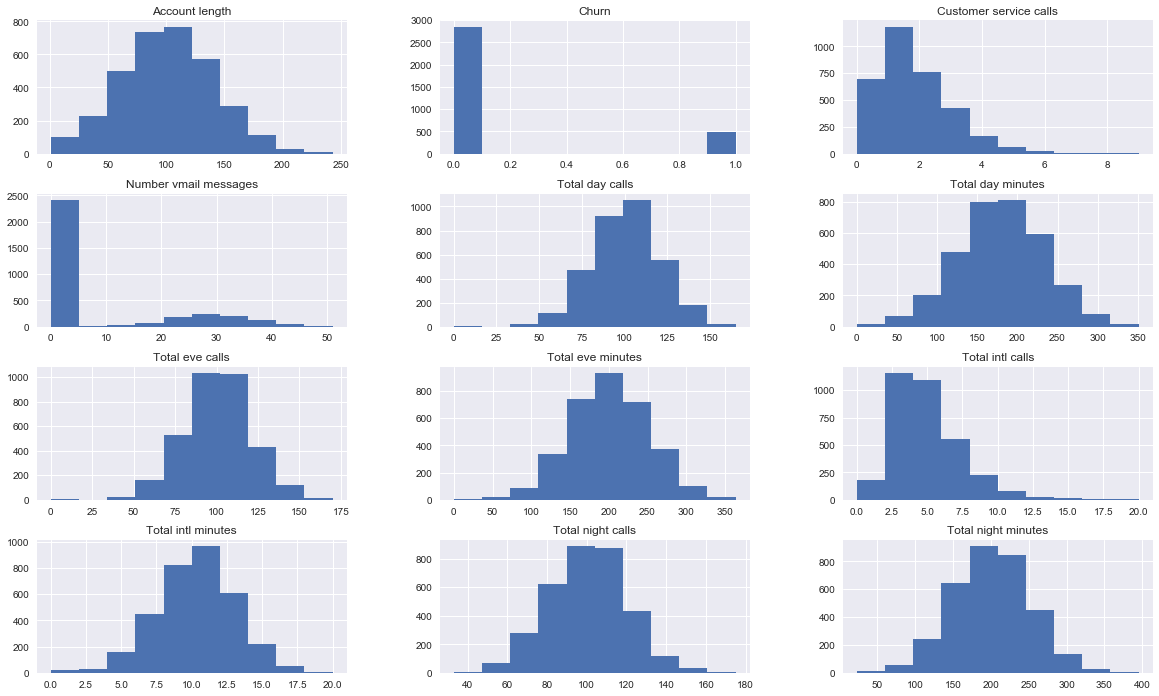

In [41]:
# а без Churn будет редкостная хуета
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge']))

df[features].hist(figsize=(20,12));

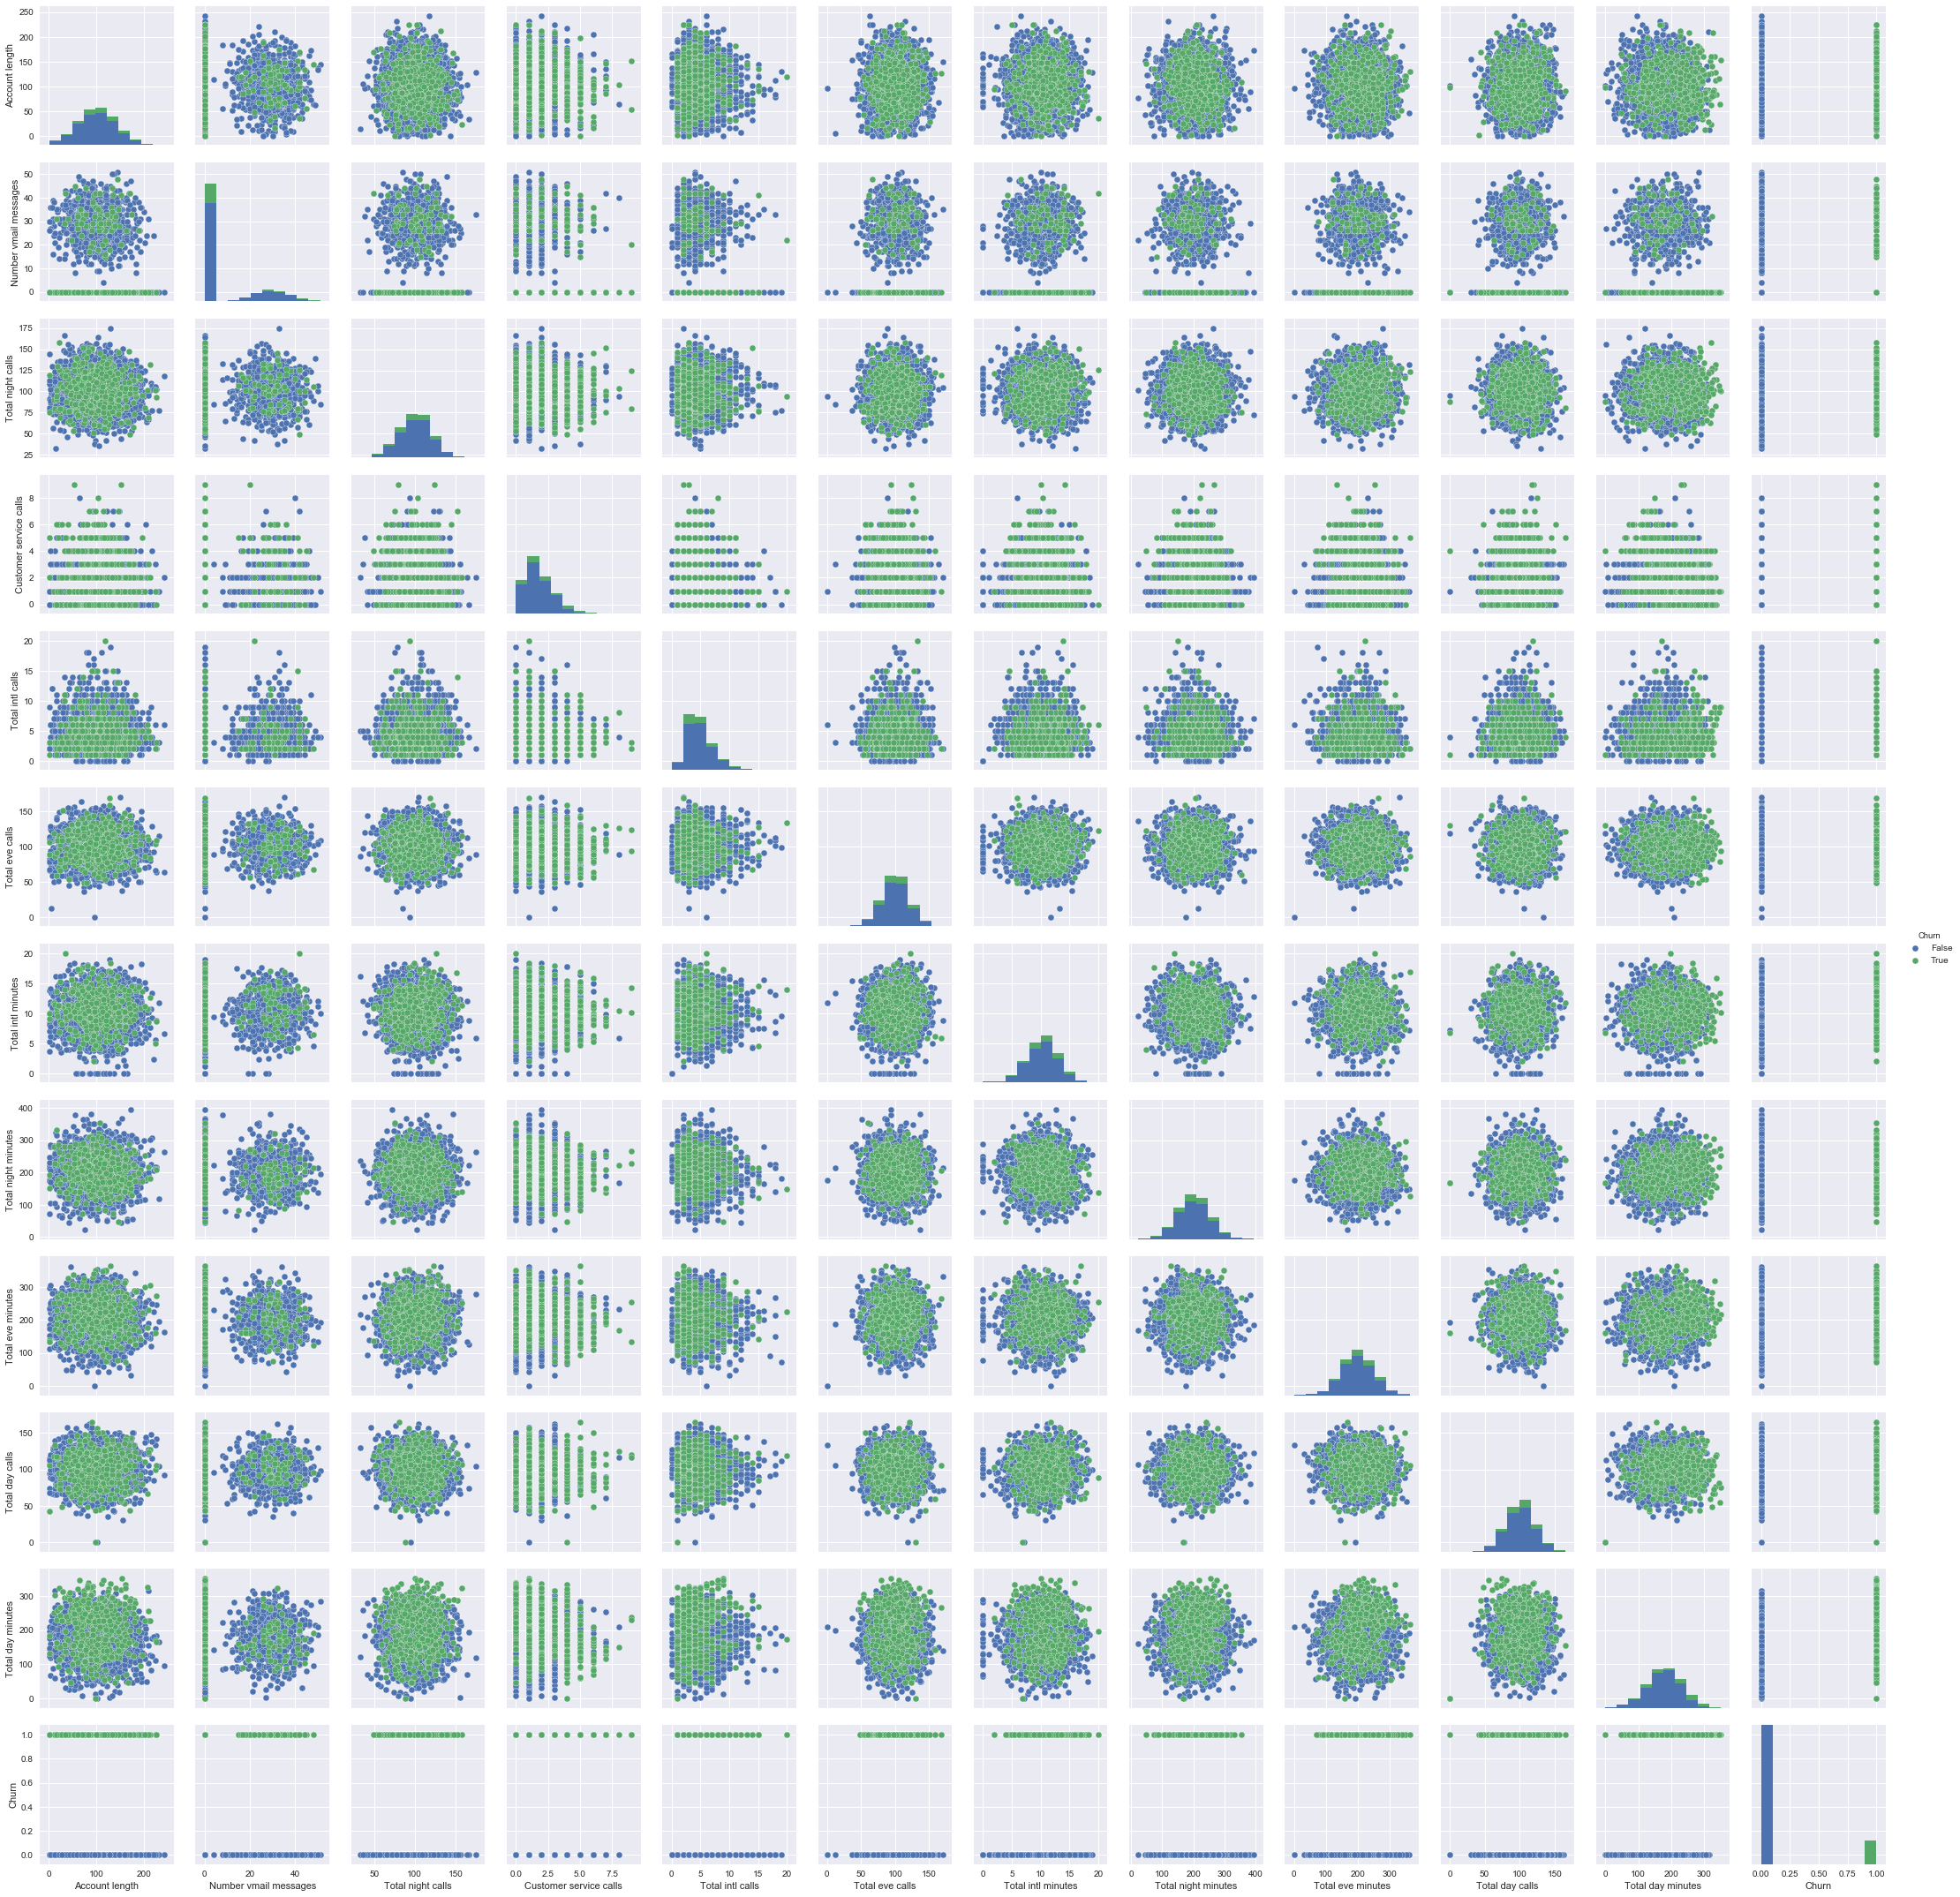

In [167]:
# Еще полезно строить вот такие картинки, где на главной диагонали рисуются распредления признаков, а вне главной диагонали 
# – диаграммы рассеяния для пар признаков. Бывает, что это приводит к каким-то выводам, но в данном случае все примерно понятно, без сюрпризов.
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))
sns.pairplot(df[features + ['Churn']], hue='Churn');

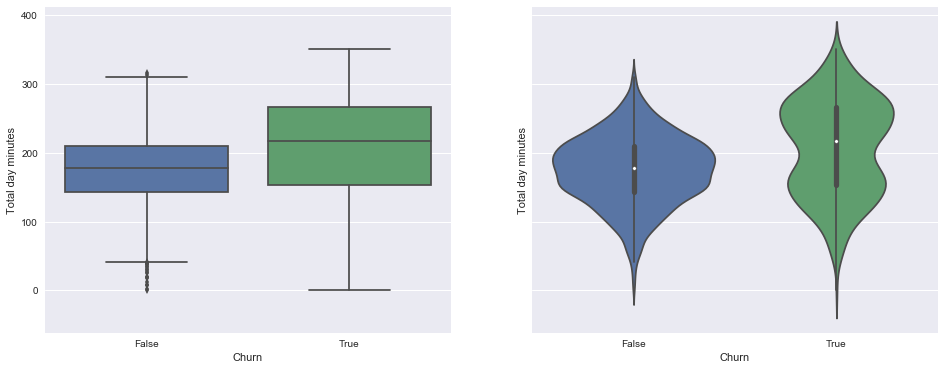

In [175]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);
# Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами,
# и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). 
# Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

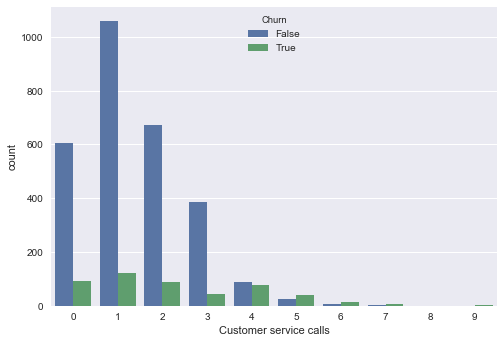

In [42]:
# Теперь изобразим распределение числа обращений в сервисный центр (такую картинку мы строили в первой статье).
# Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым),
# и наглядней изобразить распределение с помощью countplot. 
# Наблюдение: доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.
sns.countplot(x='Customer service calls', hue='Churn', data=df);

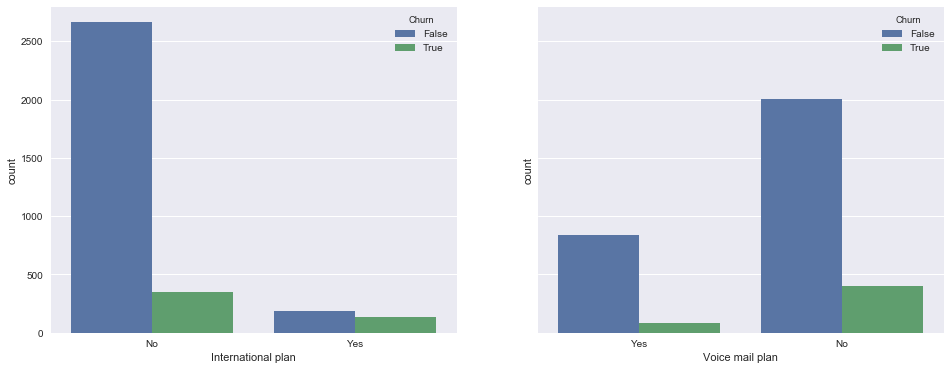

In [43]:
# Теперь посмотрим на связь бинарных признаков International plan и Voice mail plan с оттоком. 
# Наблюдение: когда роуминг подключен, доля оттока намного выше, т.е. наличие международного роуминга – сильный признак.
# Про голосовую почту такого нельзя сказать.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [44]:
# Наконец, посмотрим, как с оттоком связан категориальный признак State. С ним уже не так приятно работать,
# поскольку число уникальных штатов довольно велико – 51. Можно в начале построить сводную табличку или посчитать процент 
# оттока для каждого штата. Но данных по каждом штату по отдельности маловато (ушедших клиентов всего от 3 до 17 в каждом штате),
# поэтому, возможно, признак State впоследствии не стоит добавлять в модели классификации из-за риска переобучения
# (но мы это будем проверять на кросс-валидации, stay tuned!).
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [ ]:
# запоминаем про божественную процедуру df[[x for x in df.columns if 'Sales' in x] и идём читать про математике t-SNE.